# Healthcare Expenditure Analysis

## Importing all necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

## Reading the data into dataframe

In [2]:
# Specify the Excel file path
excel_file_path = "Residence_all_tables.xlsx"


sheet_names = ['Table 1 Personal Health Care', 'Table 2 Hospital', 'Table 3 Physician and Clinics', 'Table 4 Other Professionals','Table 5 Dental','Table 6 Home Health','Table 7 Nursing','Table 8 Drugs and Non-durables','Table 9 Durables','Table 10 Other Health','Table 21 Population','Table 22 Medicare', 'Table 25 Medicaid']
# Read all sheets into a dictionary of DataFrames
sheets_dict = pd.read_excel(excel_file_path,header = 1, sheet_name=sheet_names,index_col = 0)

# Access each sheet using the sheet name as the key
for sheet_name, sheet_data in sheets_dict.items():
    print(f"Data from sheet: {sheet_name}")
    print(sheet_data.head())

Data from sheet: Table 1 Personal Health Care
                               1991      1992      1993      1994      1995  \
Region/state of residence                                                     
United States              672711.0  728437.0  775720.0  817952.0  866811.0   
New England                 40981.0   43705.0   46452.0   48478.0   52029.0   
Connecticut                 10915.0   11603.0   12048.0   12695.0   13588.0   
Maine                        3139.0    3314.0    3551.0    3699.0    4024.0   
Massachusetts               19939.0   21199.0   22840.0   23740.0   25201.0   

                               1996      1997       1998       1999  \
Region/state of residence                                             
United States              915029.0  966064.0  1019653.0  1079208.0   
New England                 54760.0   58092.0    62148.0    65048.0   
Connecticut                 14109.0   14933.0    15865.0    16690.0   
Maine                        4382.0    4739.0

## Displaying Personal Health Care table

In [3]:
sheet_name = 'Table 1 Personal Health Care'
df = sheets_dict[sheet_name]

print(f"Data from sheet: {sheet_name}")
df.head()

Data from sheet: Table 1 Personal Health Care


,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Average\nAnnual %\nGrowth\n(1991-2020)
Region/state of residence,,,,,,,,,,,,,,,,,,,,,
United States,672711.0,728437.0,775720.0,817952.0,866811.0,915029.0,966064.0,1019653.0,1079208.0,1157014.0,...,2346962.0,2405667.0,2527325.0,2674089.0,2795322.0,2905160.0,3021796.0,3175230.0,3357832.0,0.057
New England,40981.0,43705.0,46452.0,48478.0,52029.0,54760.0,58092.0,62148.0,65048.0,69388.0,...,138405.0,141505.0,146939.0,154957.0,161532.0,166153.0,172783.0,180021.0,188974.0,0.054
Connecticut,10915.0,11603.0,12048.0,12695.0,13588.0,14109.0,14933.0,15865.0,16690.0,17626.0,...,33181.0,33944.0,35350.0,36941.0,38322.0,39289.0,40671.0,42190.0,44425.0,0.050
Maine,3139.0,3314.0,3551.0,3699.0,4024.0,4382.0,4739.0,5127.0,5566.0,5924.0,...,11625.0,11709.0,12134.0,12747.0,13347.0,13891.0,14674.0,15461.0,16306.0,0.058
Massachusetts,19939.0,21199.0,22840.0,23740.0,25201.0,26498.0,28014.0,29997.0,30810.0,32893.0,...,66322.0,67722.0,70311.0,74842.0,78446.0,80621.0,84112.0,87764.0,91817.0,0.054


## Data Description

In [4]:
df.describe()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Average\nAnnual %\nGrowth\n(1991-2020)
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,6.000000e+01,6.000000e+01,6.000000e+01,...,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,60.000000
mean,33635.550000,36421.866667,38786.000000,40897.550000,43340.550000,45751.483333,48303.250000,5.098267e+04,5.396042e+04,5.785065e+04,...,1.173481e+05,1.202834e+05,1.263663e+05,1.337044e+05,1.397661e+05,1.452580e+05,1.510898e+05,1.587615e+05,1.678916e+05,0.058600
std,90104.677732,97585.425836,103913.735395,109544.854228,116034.146313,122457.010520,129254.942939,1.363613e+05,1.443169e+05,1.546892e+05,...,3.136551e+05,3.215341e+05,3.378235e+05,3.575224e+05,3.737755e+05,3.885500e+05,4.042012e+05,4.248212e+05,4.493407e+05,0.006209
min,1018.000000,1062.000000,1166.000000,1265.000000,1376.000000,1471.000000,1561.000000,1.681000e+03,1.773000e+03,1.959000e+03,...,4.469000e+03,4.571000e+03,4.822000e+03,5.074000e+03,5.253000e+03,5.508000e+03,5.667000e+03,5.866000e+03,6.399000e+03,0.046000
25%,3490.500000,3795.250000,4106.750000,4375.500000,4701.000000,5125.750000,5538.500000,5.875500e+03,6.107000e+03,6.833750e+03,...,1.534325e+04,1.577250e+04,1.667975e+04,1.773550e+04,1.867675e+04,1.943175e+04,1.992575e+04,2.088350e+04,2.218525e+04,0.054000
50%,11056.500000,11916.000000,12580.000000,13302.500000,14071.000000,14723.000000,15633.500000,1.615550e+04,1.702600e+04,1.780400e+04,...,3.707800e+04,3.812300e+04,4.033500e+04,4.281600e+04,4.526050e+04,4.751350e+04,4.963250e+04,5.196650e+04,5.403450e+04,0.058000
75%,26009.250000,27714.500000,29385.500000,31043.500000,33134.250000,35223.250000,36753.750000,3.774300e+04,3.948725e+04,4.218550e+04,...,7.894350e+04,8.045025e+04,8.428650e+04,8.852375e+04,9.278350e+04,9.634425e+04,1.003512e+05,1.054490e+05,1.105922e+05,0.063000
max,672711.000000,728437.000000,775720.000000,817952.000000,866811.000000,915029.000000,966064.000000,1.019653e+06,1.079208e+06,1.157014e+06,...,2.346962e+06,2.405667e+06,2.527325e+06,2.674089e+06,2.795322e+06,2.905160e+06,3.021796e+06,3.175230e+06,3.357832e+06,0.077000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, United States to SOURCE: Centers for Medicare and Medicaid Services, Office of the Actuary, National Health Statistics Group.
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   1991                                 60 non-null     float64
 1   1992                                 60 non-null     float64
 2   1993                                 60 non-null     float64
 3   1994                                 60 non-null     float64
 4   1995                                 60 non-null     float64
 5   1996                                 60 non-null     float64
 6   1997                                 60 non-null     float64
 7   1998                                 60 non-null     float64
 8   1999                                 60 non-null     float64
 9   2000                                 60 non-null     

## Integrate the data

In [6]:
# Initialize an empty DataFrame
merged_data = pd.DataFrame()

sheet_names_to_merge = ['Table 1 Personal Health Care', 'Table 2 Hospital', 'Table 3 Physician and Clinics',
                        'Table 4 Other Professionals', 'Table 5 Dental', 'Table 6 Home Health', 'Table 7 Nursing',
                        'Table 8 Drugs and Non-durables', 'Table 9 Durables', 'Table 10 Other Health',
                        'Table 22 Medicare', 'Table 25 Medicaid']
# Loop through each sheet in the Excel file
for sheet_name, sheet_data in sheets_dict.items():
    
    if sheet_name == 'Table 21 Population':
        continue
    
    # Add the values of the current sheet to the merged_data DataFrame
    if merged_data.empty:
        merged_data = sheet_data
    else:
        merged_data = merged_data.add(sheet_data, fill_value=0)

# Display the merged data
merged_data


,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Average\nAnnual %\nGrowth\n(1991-2020)
Region/state of residence,,,,,,,,,,,,,,,,,,,,,
United States,1551466.0,1692482.0,1813872.0,1925863.0,2049300.0,2167585.0,2286841.0,2399186.0,2535733.0,2717304.0,...,5615822.0,5770567.0,6081046.0,6438934.0,6722901.0,6985386.0,7271932.0,7648338.0,8057100.0,0.731
New England,95427.0,102538.0,109289.0,115368.0,124539.0,130846.0,139051.0,147603.0,154296.0,164259.0,...,329907.0,337707.0,352479.0,371661.0,387136.0,397590.0,413859.0,430264.0,449036.0,0.679
Connecticut,25198.0,26854.0,28112.0,29938.0,32298.0,33597.0,35612.0,37440.0,39285.0,41492.0,...,79652.0,81457.0,85157.0,88902.0,92059.0,94528.0,98056.0,101483.0,106113.0,0.620
Maine,7294.0,7812.0,8458.0,8881.0,9632.0,10496.0,11360.0,12279.0,13201.0,14047.0,...,28059.0,28543.0,29407.0,30806.0,32176.0,33582.0,35406.0,37442.0,39309.0,0.713
Massachusetts,46813.0,50115.0,53895.0,56814.0,60805.0,63666.0,67346.0,71530.0,73657.0,78366.0,...,158172.0,161470.0,168739.0,179672.0,188192.0,192466.0,201145.0,209299.0,217765.0,0.685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nevada,6864.0,7777.0,8379.0,9183.0,9993.0,10832.0,11835.0,12880.0,13861.0,15531.0,...,39067.0,40758.0,44936.0,48014.0,51540.0,54437.0,57484.0,60680.0,62909.0,1.022
Oregon,15326.0,16982.0,18199.0,19357.0,20962.0,22168.0,23581.0,26038.0,27870.0,29814.0,...,65731.0,68672.0,76056.0,82049.0,86011.0,88630.0,93128.0,98714.0,103486.0,0.837
Washington,28767.0,31651.0,33353.0,35317.0,38101.0,39834.0,41814.0,45329.0,49140.0,52835.0,...,117561.0,119551.0,126617.0,134000.0,140437.0,146043.0,153475.0,162293.0,169230.0,0.770


## Validation of Integration

In [7]:
sum_first_column_data = pd.DataFrame()
# Loop through each sheet in the dictionary
for sheet_name in sheet_names_to_merge:
    # Skip 'Table 21 Population' sheet
    if sheet_name == 'Table 21 Population':
        continue
    
    # Extract the first column and add it to the sum_first_column_data DataFrame
    first_column_data = sheets_dict[sheet_name].iloc[:, 0]
    
    if sum_first_column_data.empty:
        sum_first_column_data = first_column_data
    else:
        sum_first_column_data = sum_first_column_data.add(first_column_data, fill_value=0)
        
        
print("**Sum of First Column from all the Sheets** \n",sum_first_column_data)
print("**First Column from merged dataframe**", merged_data.iloc[:,0])

**Sum of First Column from all the Sheets** 
 Region/state of residence
United States                                                                                                          1551466.0
New England                                                                                                              95427.0
Connecticut                                                                                                              25198.0
Maine                                                                                                                     7294.0
Massachusetts                                                                                                            46813.0
                                                                                                                         ...    
Nevada                                                                                                                    6864.0
Oregon                   

## Data Transformation

In [8]:
def transform_table(input_df):
    input_df = input_df.iloc[:,:-1]
    rows_to_keep = ["New England","Mideast","Great Lakes","Plains","Southeast","Southwest","Rocky Mountains","Far West"]
    mask = input_df.index.isin(rows_to_keep)
    df_filtered = input_df[mask]
    df_filtered = df_filtered.T
    df_filtered.columns.name = None
    df_filtered.index = pd.to_datetime(df_filtered.index, format='%Y')

    common_index = df_filtered.index
    for col in df_filtered.columns:
        variable_name = f"df_{col.replace(' ', '_')}"
        globals()[variable_name] = df_filtered[[col]].copy()
        globals()[variable_name].index = common_index
    

    
    #df_filtered.head()
    return df_filtered



In [9]:
transform_table(merged_data)

,New England,Mideast,Great Lakes,Plains,Southeast,Southwest,Rocky Mountains,Far West
1991-01-01,95427.0,320053.0,257818.0,104720.0,352434.0,138397.0,38121.0,244496.0
1992-01-01,102538.0,347939.0,280652.0,113425.0,387533.0,152573.0,41631.0,266185.0
1993-01-01,109289.0,372038.0,300135.0,120749.0,419477.0,164723.0,44855.0,282604.0
1994-01-01,115368.0,395008.0,317299.0,130164.0,449545.0,175924.0,47799.0,294754.0
1995-01-01,124539.0,417611.0,336755.0,138455.0,481868.0,189710.0,51803.0,308562.0
1996-01-01,130846.0,437319.0,355719.0,147105.0,513658.0,204136.0,55502.0,323297.0
1997-01-01,139051.0,457548.0,372766.0,155416.0,548046.0,218138.0,59404.0,336475.0
1998-01-01,147603.0,478035.0,385784.0,166110.0,569691.0,228521.0,63614.0,359824.0
1999-01-01,154296.0,506877.0,406455.0,175643.0,602494.0,243178.0,67495.0,379295.0
2000-01-01,164259.0,538241.0,435916.0,190263.0,653337.0,259335.0,74531.0,401431.0


## Time Series Analysis

## 1. New England

In [10]:
df_New_England

,New England
1991-01-01,95427.0
1992-01-01,102538.0
1993-01-01,109289.0
1994-01-01,115368.0
1995-01-01,124539.0
1996-01-01,130846.0
1997-01-01,139051.0
1998-01-01,147603.0
1999-01-01,154296.0
2000-01-01,164259.0


## Line Plot

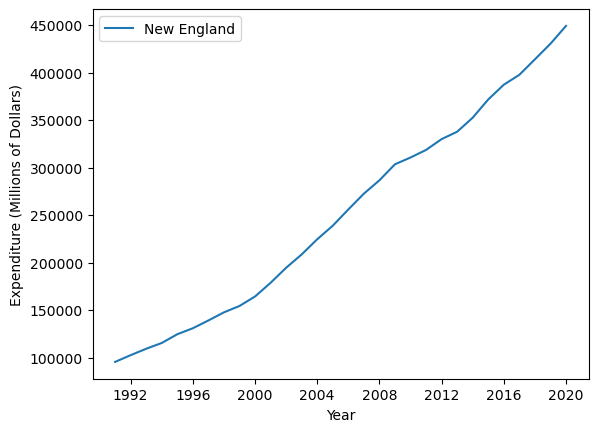

In [11]:
sns.lineplot(df_New_England)
plt.xlabel("Year")
plt.ylabel("Expenditure (Millions of Dollars)")
plt.show()

## ACF and PACF

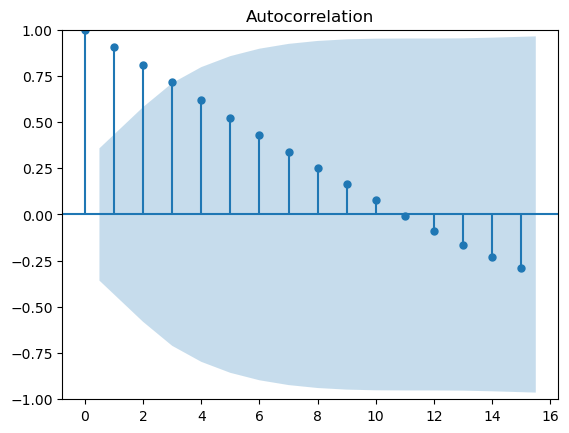

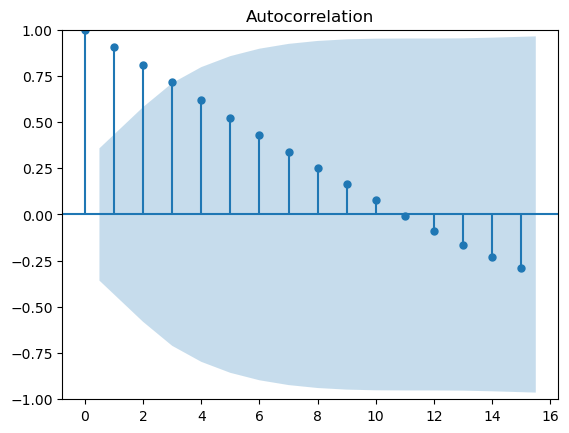

In [12]:
plot_acf(df_New_England['New England'])

C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


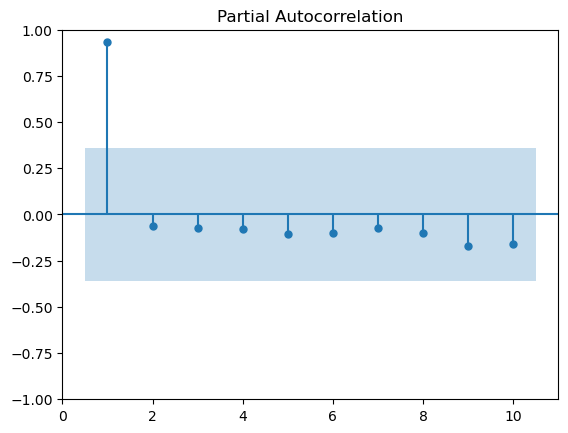

In [13]:
plot_pacf(df_New_England['New England'], lags=10, zero=False)
plt.show()

## Trend Analysis

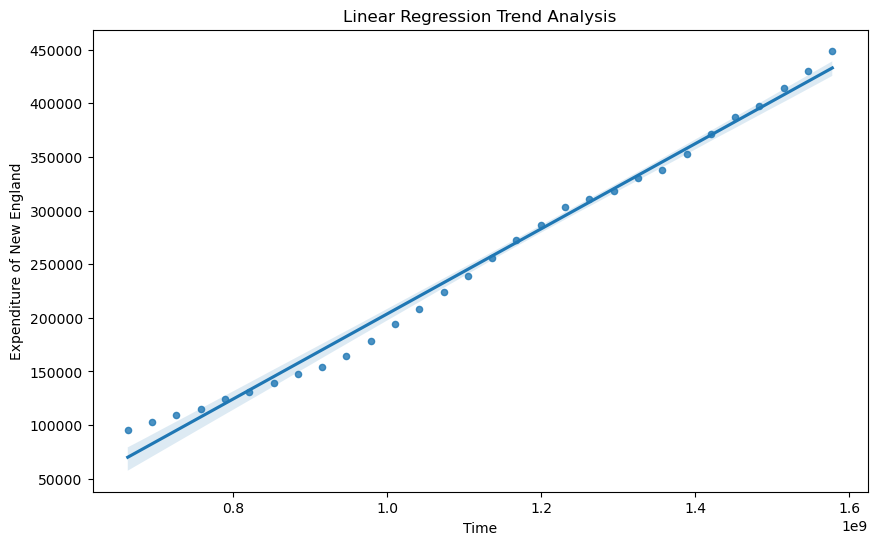

In [14]:
#sns.regplot(x=df_ny.index, y='New York', data=df_ny)
x = df_New_England.index.astype('int64') // 10**9 
y = df_New_England["New England"]
plt.figure(figsize=(10, 6))
sns.regplot(x=x, y=y,data = df_New_England,scatter_kws={'s':20})

# set the title and axis labels
plt.title('Linear Regression Trend Analysis')
plt.xlabel('Time')
plt.ylabel('Expenditure of New England')

# display the plot
plt.show()

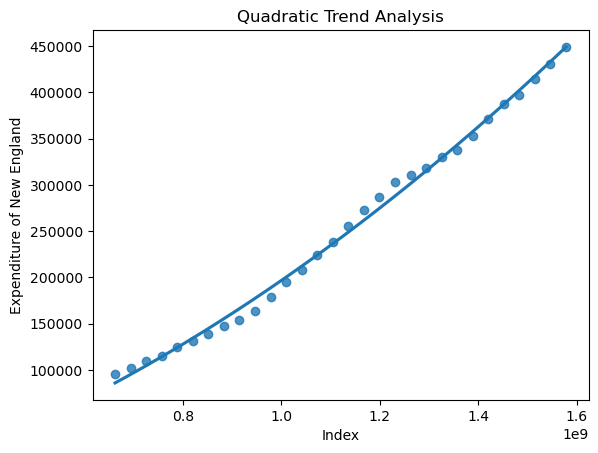

In [15]:
x = df_New_England.index.astype('int64') // 10**9  # Convert DateTime to Unix timestamp
y = df_New_England['New England']
coeffs = np.polyfit(x,y, 2)
quadratic_fit = np.polyval(coeffs, x)


# create the plot
sns.regplot(x=x, y=y, data=df_New_England, order=2, ci=None)

# set the title and axis labels
plt.title('Quadratic Trend Analysis')
plt.xlabel('Index')
plt.ylabel('Expenditure of New England')

# display the plot
plt.show()

## Train Test Split

In [17]:
train_size = int(len(df_New_England) * 0.8)  # 80% for training, adjust as needed
train, test = df_New_England[:train_size], df_New_England[train_size:]

## ARIMA Model

In [18]:
order = (2, 2, 2)
seasonal_order = (0, 0, 0, 12)  
model = SARIMAX(train['New England'], order=order, seasonal_order=seasonal_order)
results = model.fit()
print(results.summary())

forecast_steps = len(test)
forecast = results.get_forecast(steps=forecast_steps)
predicted_values = forecast.predicted_mean
conf_int = forecast.conf_int(alpha=0.05)



C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:            New England   No. Observations:                   24
Model:               SARIMAX(2, 2, 2)   Log Likelihood                -206.969
Date:                Tue, 13 Feb 2024   AIC                            423.938
Time:                        22:14:23   BIC                            429.393
Sample:                    01-01-1991   HQIC                           425.223
                         - 01-01-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7179      0.168    -10.228      0.000      -2.047      -1.389
ar.L2         -0.9635      0.125     -7.682      0.000      -1.209      -0.718
ma.L1          1.7401      0.344      5.062      0.0

In [19]:
mse = mean_squared_error(test['New England'], predicted_values)
print(f'Mean Squared Error on Test Set: {mse}')

Mean Squared Error on Test Set: 72941466.99270935


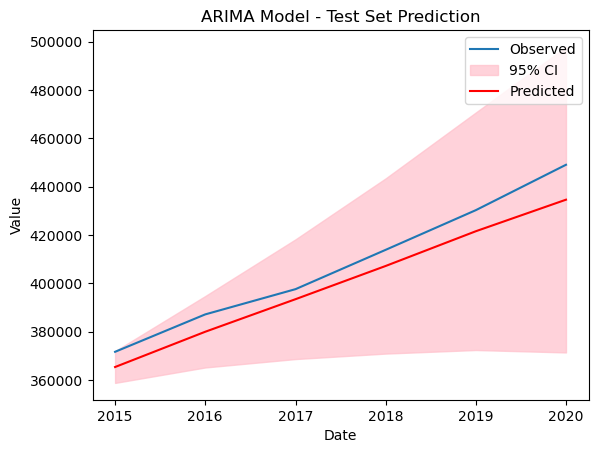

In [20]:
# Plot observed vs predicted values on the test set
plt.plot(test.index, test['New England'], label='Observed')
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.7, label='95% CI')
plt.plot(test.index, predicted_values, color='red', label='Predicted')
plt.title('ARIMA Model - Test Set Prediction')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

## Forecasting

C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


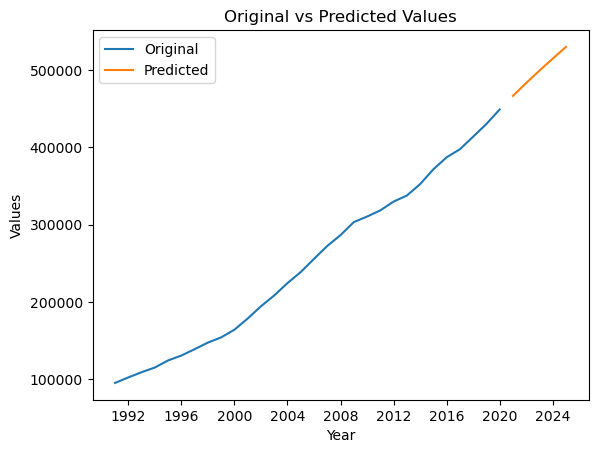

In [21]:
model_full = SARIMAX(df_New_England['New England'], order=order, seasonal_order=seasonal_order)
results_full = model_full.fit()

future_years = 5
forecast_future = results_full.get_forecast(steps=future_years)
predicted_values_future = forecast_future.predicted_mean[:future_years]
merged_df = pd.merge(df_New_England, predicted_values_future, left_index=True, right_index=True, how='outer')



plt.plot(merged_df.index, merged_df['New England'], label='Original')
plt.plot(merged_df.index, merged_df['predicted_mean'], label='Predicted')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Original vs Predicted Values')
plt.legend()

# Show the plot
plt.show()


In [22]:
predicted_values_future

2021-01-01    466603.010583
2022-01-01    483275.463971
2023-01-01    499278.571909
2024-01-01    514786.111062
2025-01-01    529921.501952
Freq: AS-JAN, Name: predicted_mean, dtype: float64

## 2. Mideast

In [24]:
df_Mideast

,Mideast
1991-01-01,320053.0
1992-01-01,347939.0
1993-01-01,372038.0
1994-01-01,395008.0
1995-01-01,417611.0
1996-01-01,437319.0
1997-01-01,457548.0
1998-01-01,478035.0
1999-01-01,506877.0
2000-01-01,538241.0


## Line Plot

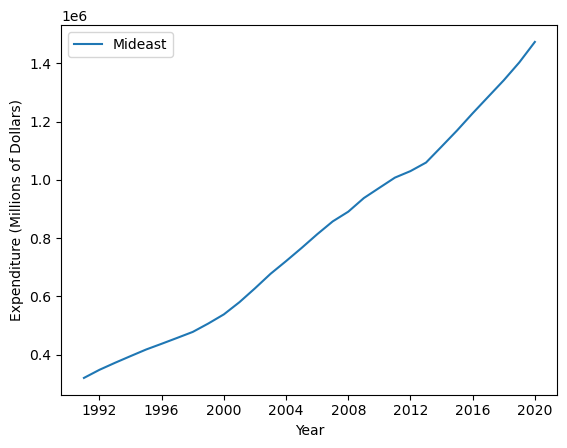

In [25]:
sns.lineplot(df_Mideast)
plt.xlabel("Year")
plt.ylabel("Expenditure (Millions of Dollars)")
plt.show()

## ACF and PACF

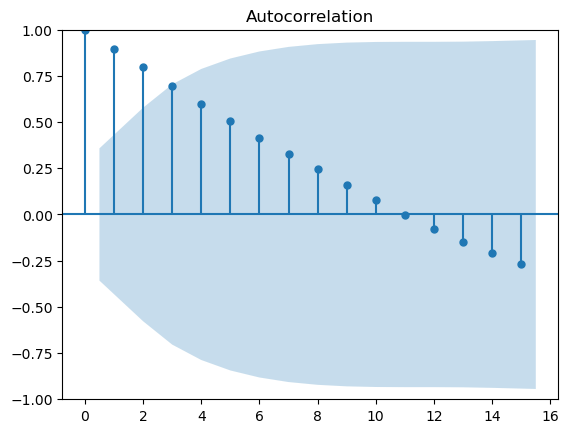

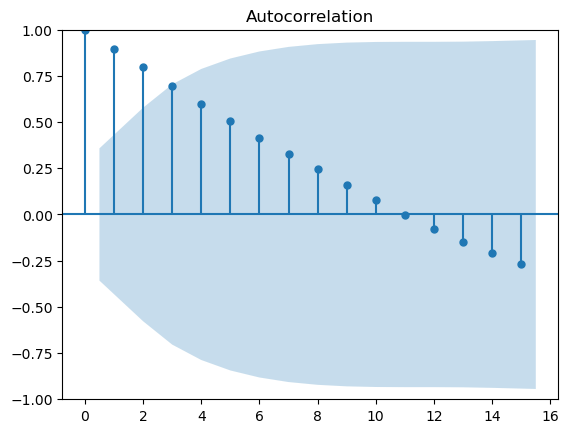

In [26]:
plot_acf(df_Mideast['Mideast'])

C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


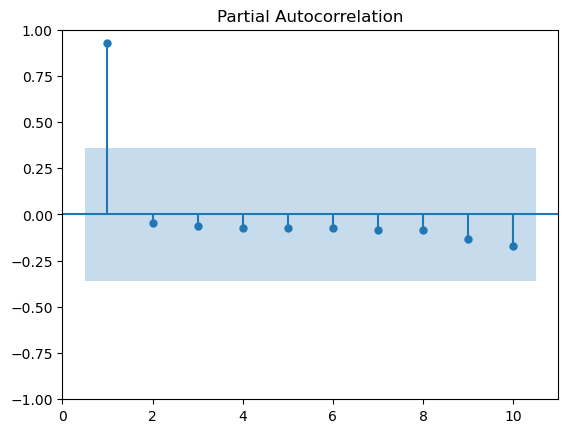

In [27]:
plot_pacf(df_Mideast['Mideast'], lags=10, zero=False)
plt.show()

## Trend Analysis

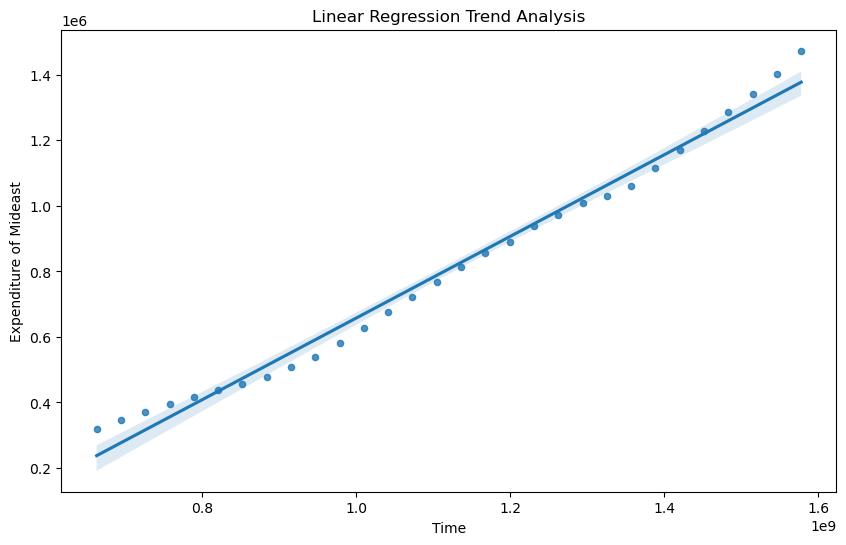

In [28]:
#sns.regplot(x=df_ny.index, y='New York', data=df_ny)
x = df_Mideast.index.astype('int64') // 10**9 
y = df_Mideast["Mideast"]
plt.figure(figsize=(10, 6))
sns.regplot(x=x, y=y,data = df_Mideast,scatter_kws={'s':20})

# set the title and axis labels
plt.title('Linear Regression Trend Analysis')
plt.xlabel('Time')
plt.ylabel('Expenditure of Mideast')

# display the plot
plt.show()

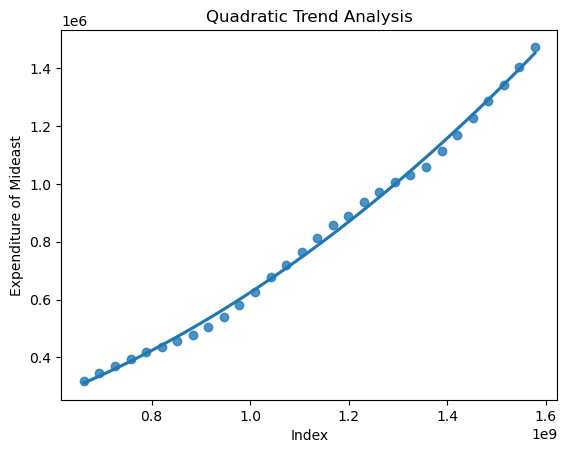

In [29]:
x = df_Mideast.index.astype('int64') // 10**9  # Convert DateTime to Unix timestamp
y = df_Mideast['Mideast']
coeffs = np.polyfit(x,y, 2)
quadratic_fit = np.polyval(coeffs, x)


# create the plot
sns.regplot(x=x, y=y, data=df_Mideast, order=2, ci=None)

# set the title and axis labels
plt.title('Quadratic Trend Analysis')
plt.xlabel('Index')
plt.ylabel('Expenditure of Mideast')

# display the plot
plt.show()

## Train Test Split

In [31]:
train_size = int(len(df_Mideast) * 0.8)  # 80% for training, adjust as needed
train, test = df_Mideast[:train_size], df_Mideast[train_size:]

## ARIMA Model

In [63]:
order = (2, 0, 2)
seasonal_order = (0, 0, 0, 12)  
model = SARIMAX(train['Mideast'], order=order, seasonal_order=seasonal_order)
results = model.fit()
print(results.summary())

forecast_steps = len(test)
forecast = results.get_forecast(steps=forecast_steps)
predicted_values = forecast.predicted_mean
conf_int = forecast.conf_int(alpha=0.05)


                               SARIMAX Results                                
Dep. Variable:                Mideast   No. Observations:                   24
Model:               SARIMAX(2, 0, 2)   Log Likelihood                -260.793
Date:                Mon, 12 Feb 2024   AIC                            531.587
Time:                        23:32:39   BIC                            537.477
Sample:                    01-01-1991   HQIC                           533.149
                         - 01-01-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8121      0.154     11.755      0.000       1.510       2.114
ar.L2         -0.8138      0.157     -5.177      0.000      -1.122      -0.506
ma.L1          0.7454      0.134      5.563      0.0

C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [64]:
mse = mean_squared_error(test['Mideast'], predicted_values)
print(f'Mean Squared Error on Test Set: {mse}')

Mean Squared Error on Test Set: 2679985657.252085


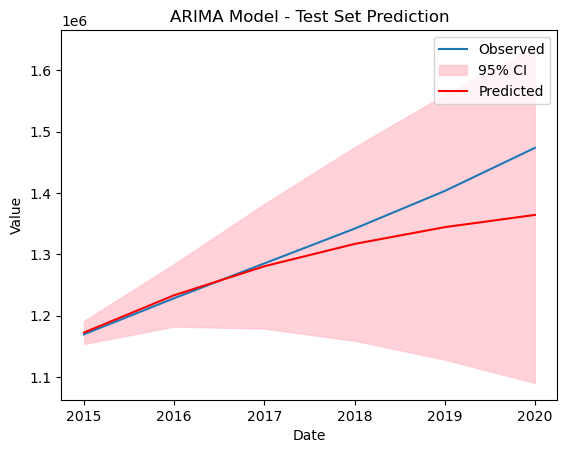

In [65]:
# Plot observed vs predicted values on the test set
plt.plot(test.index, test['Mideast'], label='Observed')
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.7, label='95% CI')
plt.plot(test.index, predicted_values, color='red', label='Predicted')
plt.title('ARIMA Model - Test Set Prediction')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

## Forecasting

C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


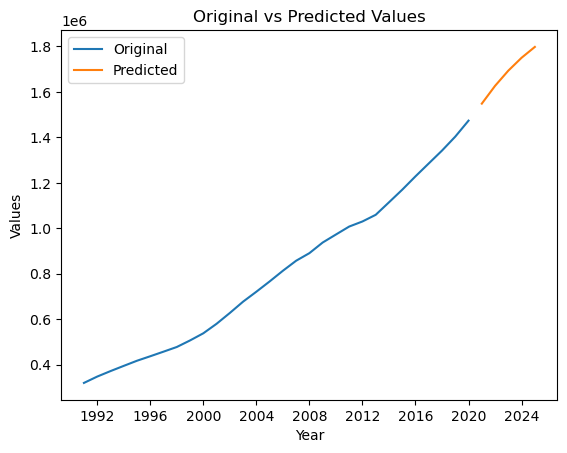

In [66]:
model_full = SARIMAX(df_Mideast['Mideast'], order=order, seasonal_order=seasonal_order)
results_full = model_full.fit()

future_years = 5
forecast_future = results_full.get_forecast(steps=future_years)
predicted_values_future = forecast_future.predicted_mean[:future_years]
merged_df = pd.merge(df_Mideast, predicted_values_future, left_index=True, right_index=True, how='outer')



plt.plot(merged_df.index, merged_df['Mideast'], label='Original')
plt.plot(merged_df.index, merged_df['predicted_mean'], label='Predicted')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Original vs Predicted Values')
plt.legend()

# Show the plot
plt.show()


In [67]:
predicted_values_future

2021-01-01    1.548166e+06
2022-01-01    1.626416e+06
2023-01-01    1.693228e+06
2024-01-01    1.749902e+06
2025-01-01    1.797594e+06
Freq: AS-JAN, Name: predicted_mean, dtype: float64

## 3. Great Lakes

In [101]:
df_Great_Lakes

,Great Lakes
1991-01-01,257818.0
1992-01-01,280652.0
1993-01-01,300135.0
1994-01-01,317299.0
1995-01-01,336755.0
1996-01-01,355719.0
1997-01-01,372766.0
1998-01-01,385784.0
1999-01-01,406455.0
2000-01-01,435916.0


## Line Plot

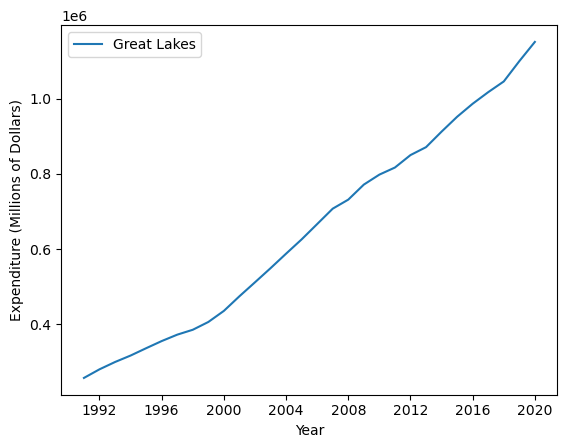

In [102]:
sns.lineplot(df_Great_Lakes)
plt.xlabel("Year")
plt.ylabel("Expenditure (Millions of Dollars)")
plt.show()

## ACF and PACF

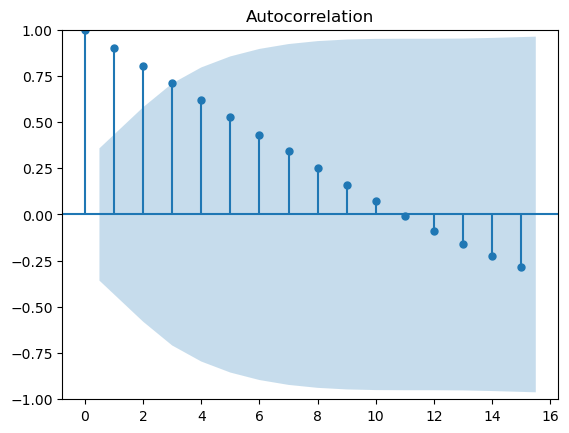

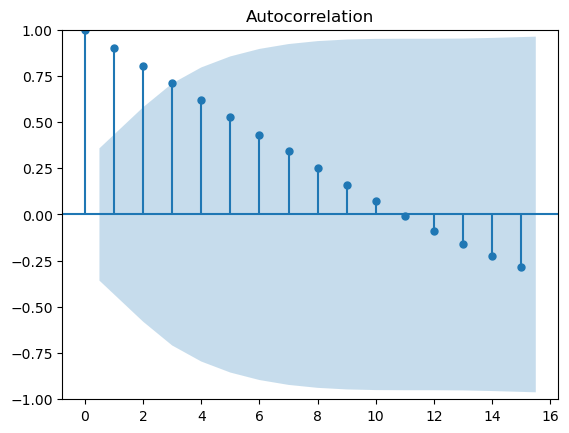

In [103]:
plot_acf(df_Great_Lakes['Great Lakes'])

C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


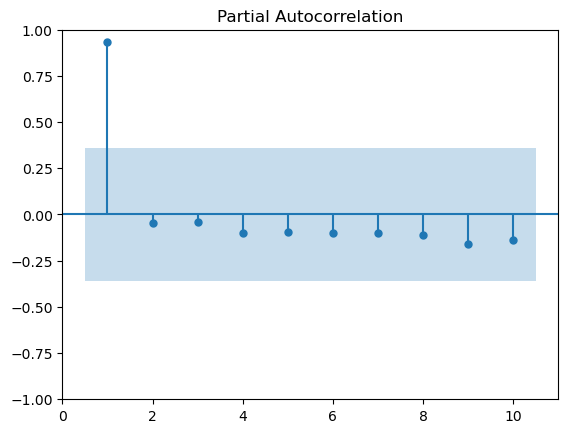

In [104]:
plot_pacf(df_Great_Lakes['Great Lakes'], lags=10, zero=False)
plt.show()

## Trend Analysis

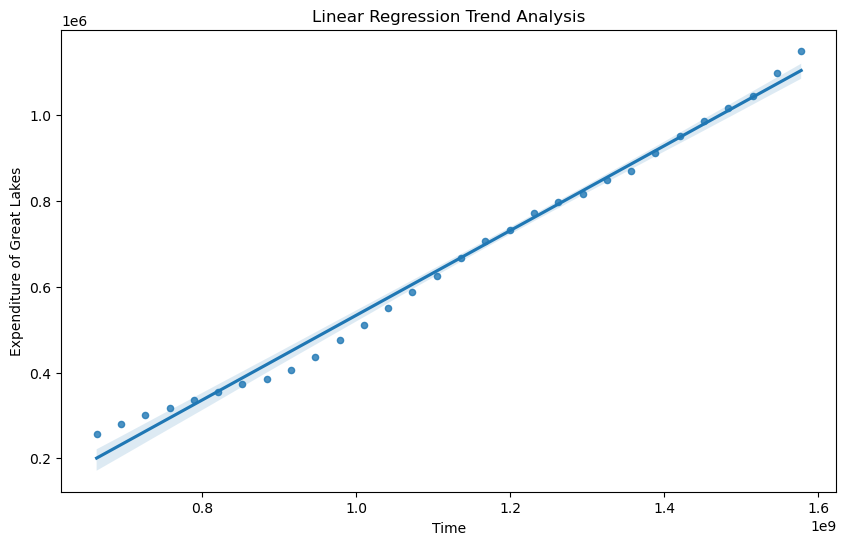

In [105]:
#sns.regplot(x=df_ny.index, y='New York', data=df_ny)
x = df_Great_Lakes.index.astype('int64') // 10**9 
y = df_Great_Lakes["Great Lakes"]
plt.figure(figsize=(10, 6))
sns.regplot(x=x, y=y,data = df_Great_Lakes,scatter_kws={'s':20})

# set the title and axis labels
plt.title('Linear Regression Trend Analysis')
plt.xlabel('Time')
plt.ylabel('Expenditure of Great Lakes')

# display the plot
plt.show()

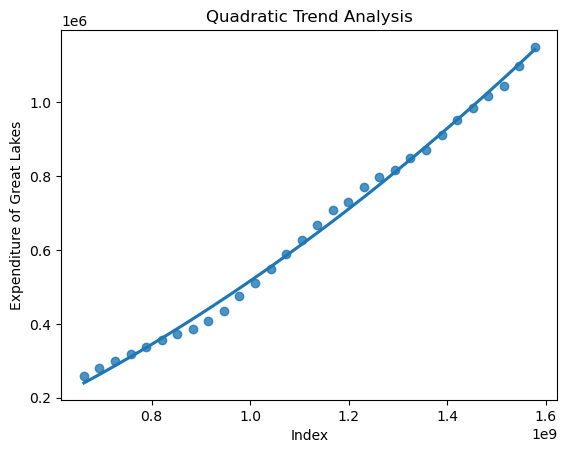

In [106]:
x = df_Great_Lakes.index.astype('int64') // 10**9  # Convert DateTime to Unix timestamp
y = df_Great_Lakes['Great Lakes']
coeffs = np.polyfit(x,y, 2)
quadratic_fit = np.polyval(coeffs, x)


# create the plot
sns.regplot(x=x, y=y, data=df_Great_Lakes, order=2, ci=None)

# set the title and axis labels
plt.title('Quadratic Trend Analysis')
plt.xlabel('Index')
plt.ylabel('Expenditure of Great Lakes')

# display the plot
plt.show()

## Train Test Split

In [109]:
train_size = int(len(df_Great_Lakes) * 0.8)  # 80% for training, adjust as needed
train, test = df_Great_Lakes[:train_size], df_Great_Lakes[train_size:]

## ARIMA Model

In [110]:
order = (2, 2, 2)
seasonal_order = (0, 0, 0, 12)  
model = SARIMAX(train['Great Lakes'], order=order, seasonal_order=seasonal_order)
results = model.fit()
print(results.summary())

forecast_steps = len(test)
forecast = results.get_forecast(steps=forecast_steps)
predicted_values = forecast.predicted_mean
conf_int = forecast.conf_int(alpha=0.05)

                               SARIMAX Results                                
Dep. Variable:            Great Lakes   No. Observations:                   24
Model:               SARIMAX(2, 2, 2)   Log Likelihood                -227.977
Date:                Tue, 13 Feb 2024   AIC                            465.953
Time:                        23:01:56   BIC                            471.409
Sample:                    01-01-1991   HQIC                           467.239
                         - 01-01-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5623      0.089    -17.572      0.000      -1.737      -1.388
ar.L2         -0.9873      0.034    -28.779      0.000      -1.055      -0.920
ma.L1          1.5820      0.354      4.470      0.0

C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [111]:
mse = mean_squared_error(test['Great Lakes'], predicted_values)
print(f'Mean Squared Error on Test Set: {mse}')

Mean Squared Error on Test Set: 128367340.6766376


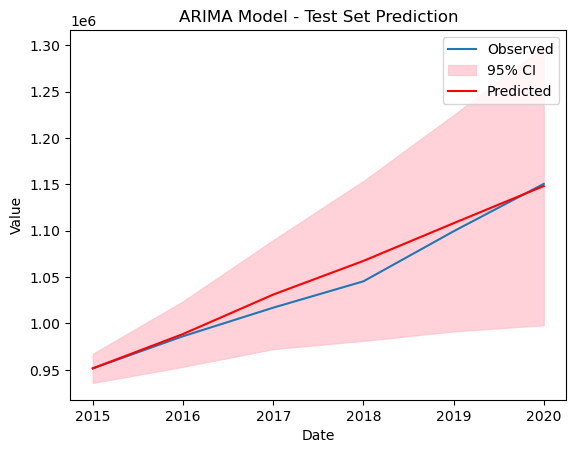

In [112]:
# Plot observed vs predicted values on the test set
plt.plot(test.index, test['Great Lakes'], label='Observed')
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.7, label='95% CI')
plt.plot(test.index, predicted_values, color='red', label='Predicted')
plt.title('ARIMA Model - Test Set Prediction')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

## Forecasting

C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


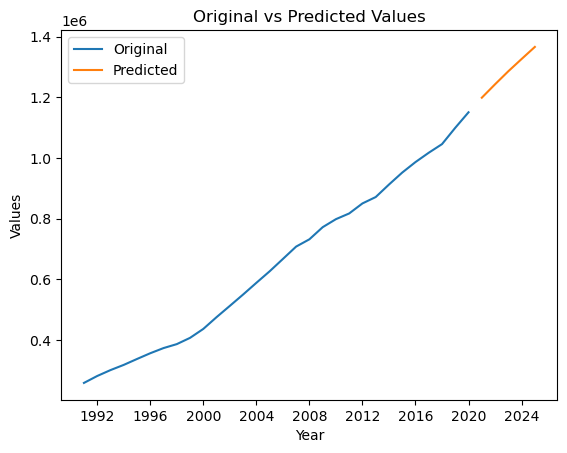

In [113]:
model_full = SARIMAX(df_Great_Lakes['Great Lakes'], order=order, seasonal_order=seasonal_order)
results_full = model_full.fit()

future_years = 5
forecast_future = results_full.get_forecast(steps=future_years)
predicted_values_future = forecast_future.predicted_mean[:future_years]
merged_df = pd.merge(df_Great_Lakes, predicted_values_future, left_index=True, right_index=True, how='outer')



plt.plot(merged_df.index, merged_df['Great Lakes'], label='Original')
plt.plot(merged_df.index, merged_df['predicted_mean'], label='Predicted')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Original vs Predicted Values')
plt.legend()

# Show the plot
plt.show()

In [114]:
predicted_values_future

2021-01-01    1.198592e+06
2022-01-01    1.242873e+06
2023-01-01    1.285786e+06
2024-01-01    1.326139e+06
2025-01-01    1.366072e+06
Freq: AS-JAN, Name: predicted_mean, dtype: float64

## 4. Plains

In [115]:
df_Plains

,Plains
1991-01-01,104720.0
1992-01-01,113425.0
1993-01-01,120749.0
1994-01-01,130164.0
1995-01-01,138455.0
1996-01-01,147105.0
1997-01-01,155416.0
1998-01-01,166110.0
1999-01-01,175643.0
2000-01-01,190263.0


## Line Plot

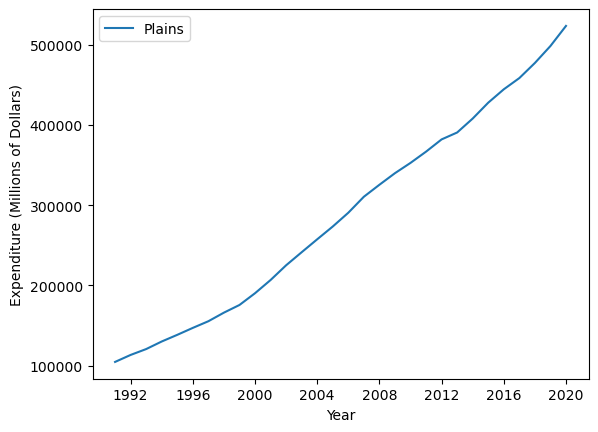

In [116]:
sns.lineplot(df_Plains)
plt.xlabel("Year")
plt.ylabel("Expenditure (Millions of Dollars)")
plt.show()

## ACF and PACF

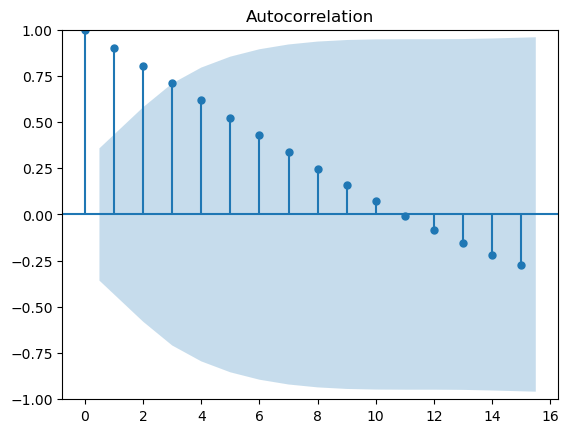

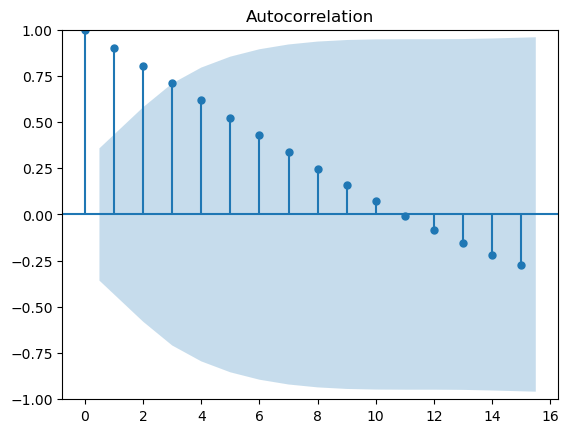

In [117]:
plot_acf(df_Plains['Plains'])

C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


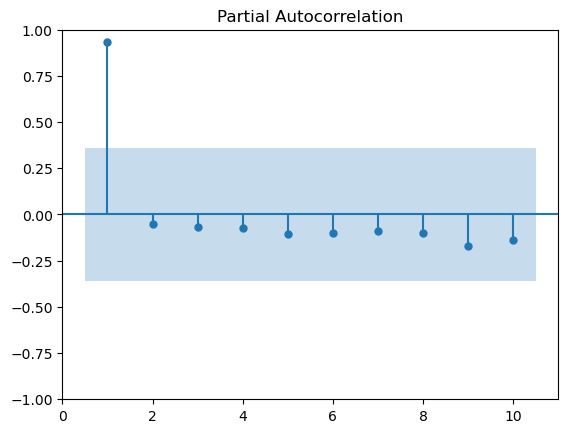

In [118]:
plot_pacf(df_Plains['Plains'], lags=10, zero=False)
plt.show()

## Trend Analysis

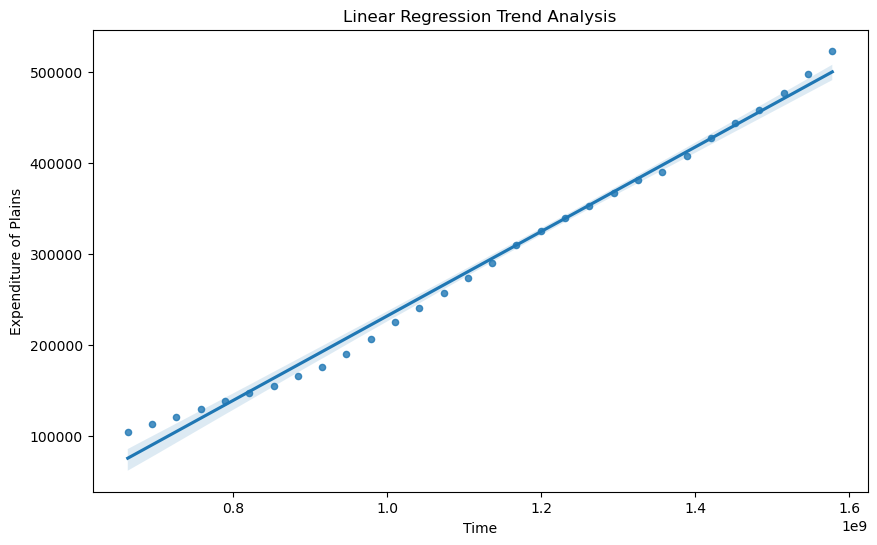

In [119]:
#sns.regplot(x=df_ny.index, y='New York', data=df_ny)
x = df_Plains.index.astype('int64') // 10**9 
y = df_Plains["Plains"]
plt.figure(figsize=(10, 6))
sns.regplot(x=x, y=y,data = df_Plains,scatter_kws={'s':20})

# set the title and axis labels
plt.title('Linear Regression Trend Analysis')
plt.xlabel('Time')
plt.ylabel('Expenditure of Plains')

# display the plot
plt.show()

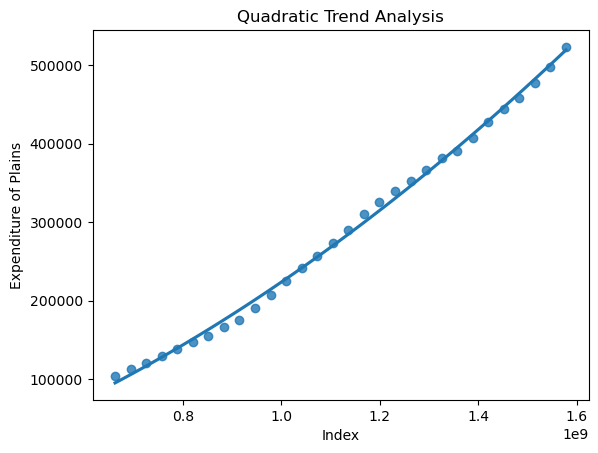

In [120]:
x = df_Plains.index.astype('int64') // 10**9  # Convert DateTime to Unix timestamp
y = df_Plains['Plains']
coeffs = np.polyfit(x,y, 2)
quadratic_fit = np.polyval(coeffs, x)


# create the plot
sns.regplot(x=x, y=y, data=df_Plains, order=2, ci=None)

# set the title and axis labels
plt.title('Quadratic Trend Analysis')
plt.xlabel('Index')
plt.ylabel('Expenditure of Plains')

# display the plot
plt.show()

## Train Test Split

In [122]:
train_size = int(len(df_Plains) * 0.8)  # 80% for training, adjust as needed
train, test = df_Plains[:train_size], df_Plains[train_size:]

## ARIMA Model

In [140]:
order = (2, 2, 2)
seasonal_order = (0, 0, 0, 12)  
model = SARIMAX(train['Plains'], order=order, seasonal_order=seasonal_order)
results = model.fit()
print(results.summary())

forecast_steps = len(test)
forecast = results.get_forecast(steps=forecast_steps)
predicted_values = forecast.predicted_mean
conf_int = forecast.conf_int(alpha=0.05)

                               SARIMAX Results                                
Dep. Variable:                 Plains   No. Observations:                   24
Model:               SARIMAX(2, 2, 2)   Log Likelihood                -205.396
Date:                Tue, 13 Feb 2024   AIC                            420.791
Time:                        23:03:56   BIC                            426.246
Sample:                    01-01-1991   HQIC                           422.076
                         - 01-01-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2082      0.209     -0.996      0.319      -0.618       0.201
ar.L2          0.7622      0.207      3.684      0.000       0.357       1.168
ma.L1         -0.0028      0.895     -0.003      0.9

C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Shravan\anaconda3\envs\myV

In [141]:
mse = mean_squared_error(test['Plains'], predicted_values)
print(f'Mean Squared Error on Test Set: {mse}')

Mean Squared Error on Test Set: 94217144.86801513


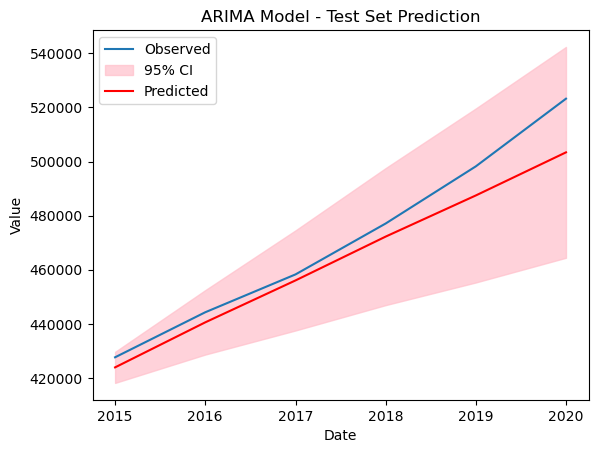

In [142]:
# Plot observed vs predicted values on the test set
plt.plot(test.index, test['Plains'], label='Observed')
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.7, label='95% CI')
plt.plot(test.index, predicted_values, color='red', label='Predicted')
plt.title('ARIMA Model - Test Set Prediction')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

## Forecasting

C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


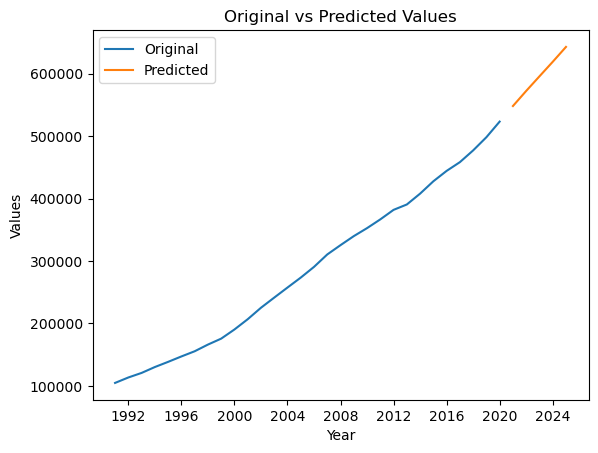

In [143]:
model_full = SARIMAX(df_Plains['Plains'], order=order, seasonal_order=seasonal_order)
results_full = model_full.fit()

future_years = 5
forecast_future = results_full.get_forecast(steps=future_years)
predicted_values_future = forecast_future.predicted_mean[:future_years]
merged_df = pd.merge(df_Plains, predicted_values_future, left_index=True, right_index=True, how='outer')

plt.plot(merged_df.index, merged_df['Plains'], label='Original')
plt.plot(merged_df.index, merged_df['predicted_mean'], label='Predicted')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Original vs Predicted Values')
plt.legend()

# Show the plot
plt.show()

In [144]:
predicted_values_future

2021-01-01    548180.694509
2022-01-01    572345.210505
2023-01-01    595700.975818
2024-01-01    618939.352284
2025-01-01    642827.215014
Freq: AS-JAN, Name: predicted_mean, dtype: float64

## 5. Southeast

In [145]:
df_Southeast

,Southeast
1991-01-01,352434.0
1992-01-01,387533.0
1993-01-01,419477.0
1994-01-01,449545.0
1995-01-01,481868.0
1996-01-01,513658.0
1997-01-01,548046.0
1998-01-01,569691.0
1999-01-01,602494.0
2000-01-01,653337.0


## Line Plot

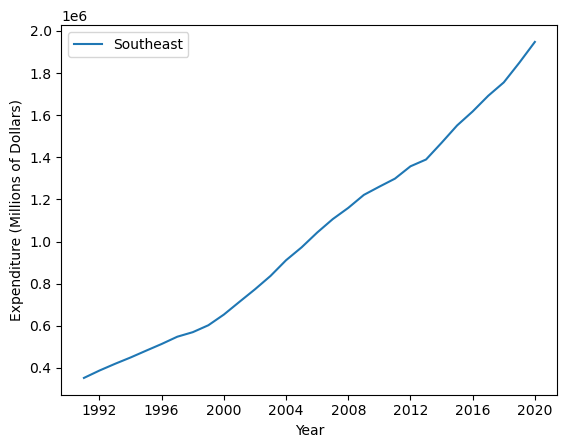

In [146]:
sns.lineplot(df_Southeast)
plt.xlabel("Year")
plt.ylabel("Expenditure (Millions of Dollars)")
plt.show()

## ACF and PACF

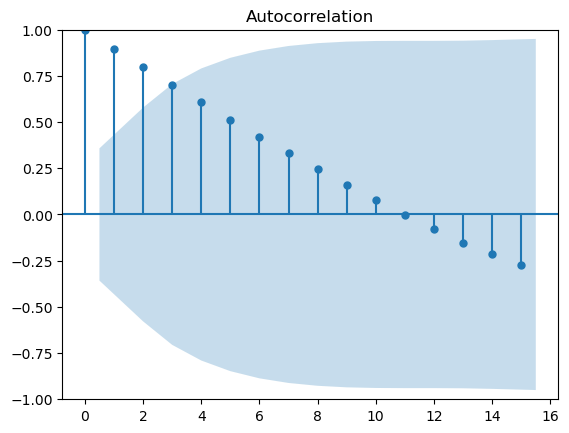

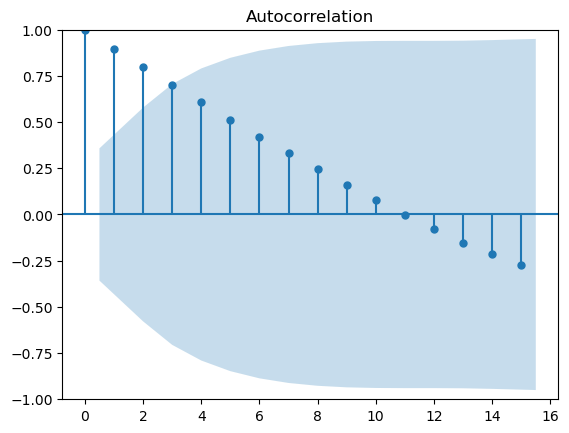

In [147]:
plot_acf(df_Southeast['Southeast'])

C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


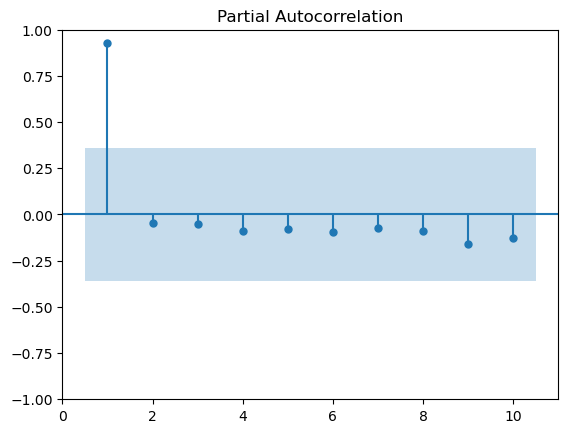

In [148]:
plot_pacf(df_Southeast['Southeast'], lags=10, zero=False)
plt.show()

## Trend Analysis

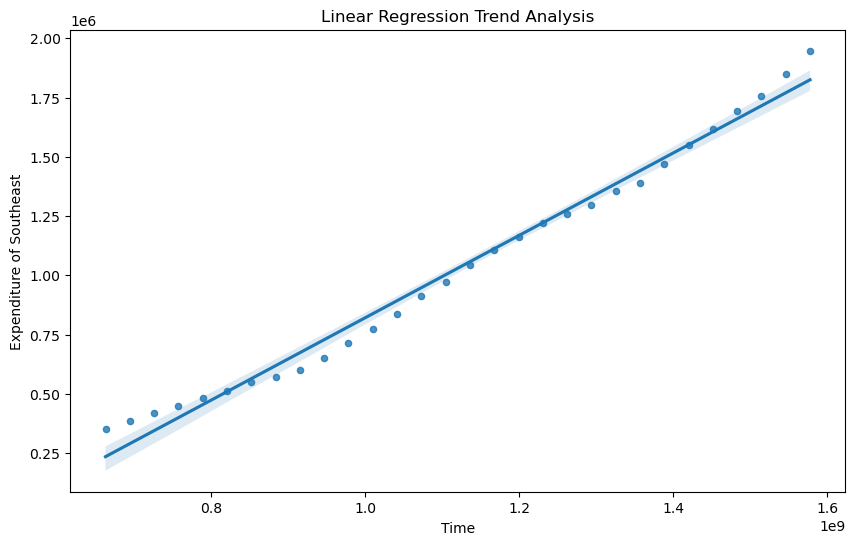

In [149]:
#sns.regplot(x=df_ny.index, y='New York', data=df_ny)
x = df_Southeast.index.astype('int64') // 10**9 
y = df_Southeast["Southeast"]
plt.figure(figsize=(10, 6))
sns.regplot(x=x, y=y,data = df_Southeast,scatter_kws={'s':20})

# set the title and axis labels
plt.title('Linear Regression Trend Analysis')
plt.xlabel('Time')
plt.ylabel('Expenditure of Southeast')

# display the plot
plt.show()

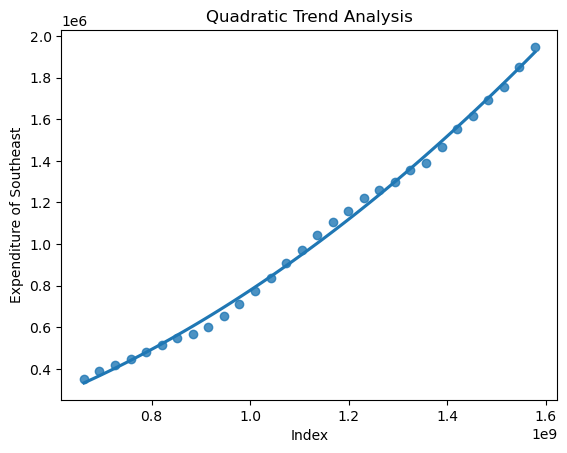

In [150]:
x = df_Southeast.index.astype('int64') // 10**9  # Convert DateTime to Unix timestamp
y = df_Southeast['Southeast']
coeffs = np.polyfit(x,y, 2)
quadratic_fit = np.polyval(coeffs, x)


# create the plot
sns.regplot(x=x, y=y, data=df_Southeast, order=2, ci=None)

# set the title and axis labels
plt.title('Quadratic Trend Analysis')
plt.xlabel('Index')
plt.ylabel('Expenditure of Southeast')

# display the plot
plt.show()

## Train Test Split

In [152]:
train_size = int(len(df_Southeast) * 0.8)  # 80% for training, adjust as needed
train, test = df_Southeast[:train_size], df_Southeast[train_size:]

## ARIMA Model

In [172]:
order = (2, 2, 2)
seasonal_order = (0, 0, 0, 12)  
model = SARIMAX(train['Southeast'], order=order, seasonal_order=seasonal_order)
results = model.fit()
print(results.summary())

forecast_steps = len(test)
forecast = results.get_forecast(steps=forecast_steps)
predicted_values = forecast.predicted_mean
conf_int = forecast.conf_int(alpha=0.05)

C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Southeast   No. Observations:                   24
Model:               SARIMAX(2, 2, 2)   Log Likelihood                -239.520
Date:                Tue, 13 Feb 2024   AIC                            489.040
Time:                        23:06:03   BIC                            494.495
Sample:                    01-01-1991   HQIC                           490.325
                         - 01-01-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5421      0.099    -15.590      0.000      -1.736      -1.348
ar.L2         -0.9967      0.038    -26.145      0.000      -1.071      -0.922
ma.L1          1.5486      0.190      8.161      0.0

In [173]:
mse = mean_squared_error(test['Southeast'], predicted_values)
print(f'Mean Squared Error on Test Set: {mse}')

Mean Squared Error on Test Set: 184490183.58668852


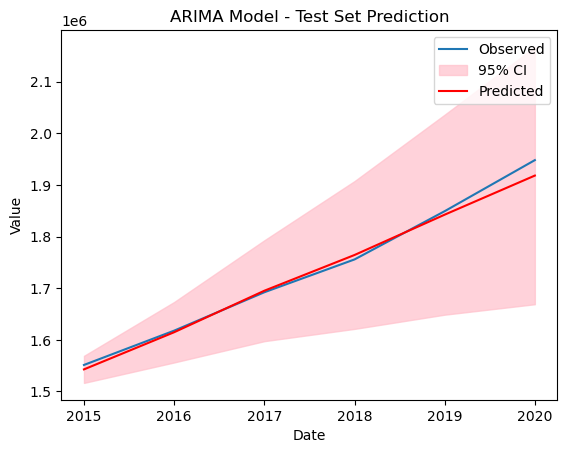

In [174]:
# Plot observed vs predicted values on the test set
plt.plot(test.index, test['Southeast'], label='Observed')
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.7, label='95% CI')
plt.plot(test.index, predicted_values, color='red', label='Predicted')
plt.title('ARIMA Model - Test Set Prediction')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

## Forecasting

C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


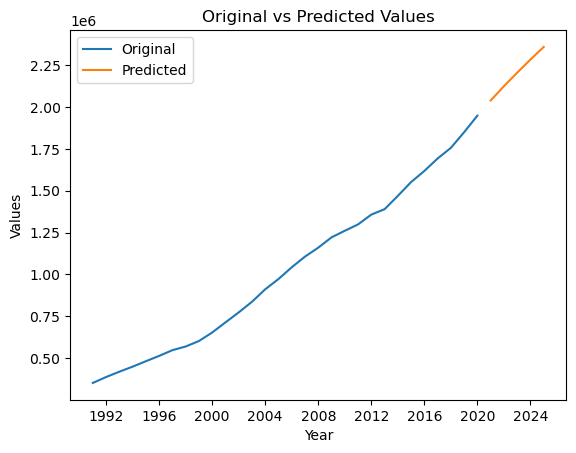

In [175]:
model_full = SARIMAX(df_Southeast['Southeast'], order=order, seasonal_order=seasonal_order)
results_full = model_full.fit()

future_years = 5
forecast_future = results_full.get_forecast(steps=future_years)
predicted_values_future = forecast_future.predicted_mean[:future_years]
merged_df = pd.merge(df_Southeast, predicted_values_future, left_index=True, right_index=True, how='outer')

plt.plot(merged_df.index, merged_df['Southeast'], label='Original')
plt.plot(merged_df.index, merged_df['predicted_mean'], label='Predicted')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Original vs Predicted Values')
plt.legend()

# Show the plot
plt.show()

In [176]:
predicted_values_future

2021-01-01    2.038351e+06
2022-01-01    2.123754e+06
2023-01-01    2.204427e+06
2024-01-01    2.282638e+06
2025-01-01    2.358060e+06
Freq: AS-JAN, Name: predicted_mean, dtype: float64

## 6. Southwest

In [177]:
df_Southwest

,Southwest
1991-01-01,138397.0
1992-01-01,152573.0
1993-01-01,164723.0
1994-01-01,175924.0
1995-01-01,189710.0
1996-01-01,204136.0
1997-01-01,218138.0
1998-01-01,228521.0
1999-01-01,243178.0
2000-01-01,259335.0


## Line Plot

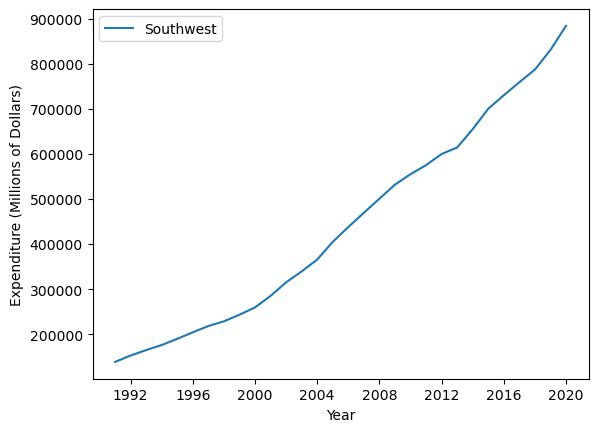

In [178]:
sns.lineplot(df_Southwest)
plt.xlabel("Year")
plt.ylabel("Expenditure (Millions of Dollars)")
plt.show()

## ACF and PACF

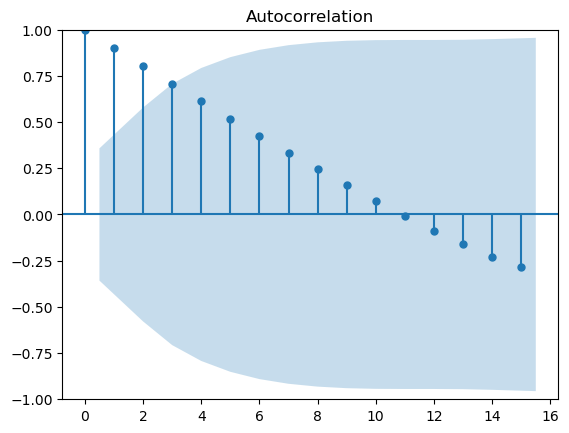

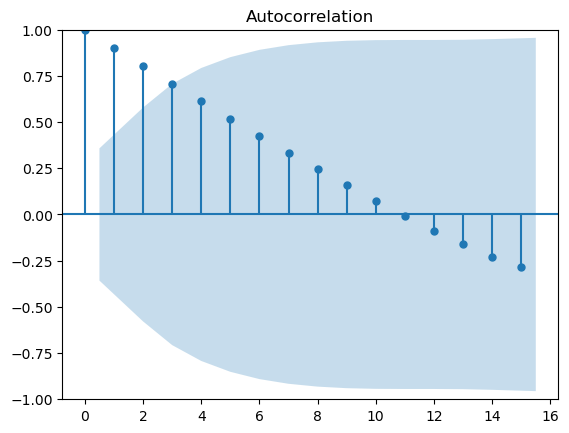

In [179]:
plot_acf(df_Southwest['Southwest'])

C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


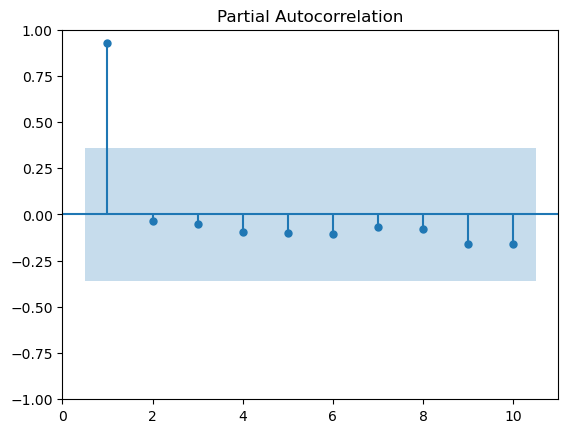

In [180]:
plot_pacf(df_Southwest['Southwest'], lags=10, zero=False)
plt.show()


## Trend Analysis

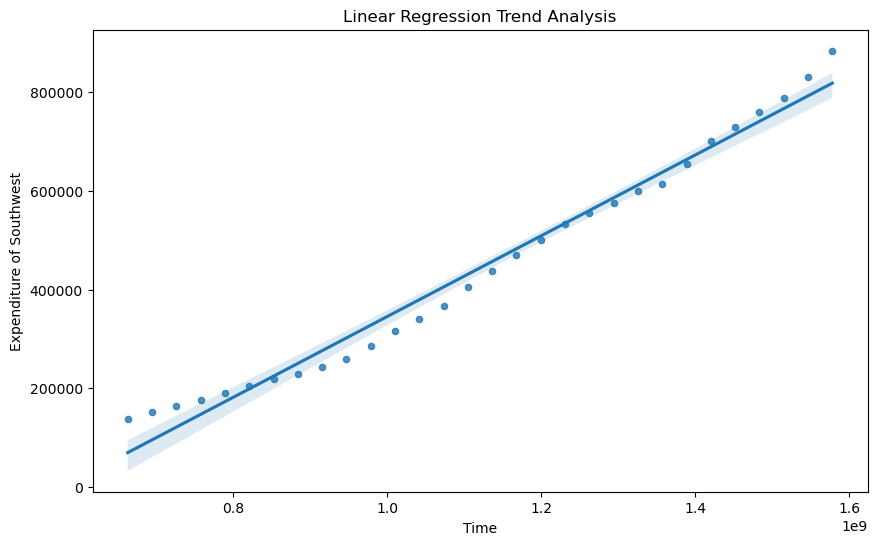

In [181]:
#sns.regplot(x=df_ny.index, y='New York', data=df_ny)
x = df_Southwest.index.astype('int64') // 10**9 
y = df_Southwest["Southwest"]
plt.figure(figsize=(10, 6))
sns.regplot(x=x, y=y,data = df_Southwest,scatter_kws={'s':20})

# set the title and axis labels
plt.title('Linear Regression Trend Analysis')
plt.xlabel('Time')
plt.ylabel('Expenditure of Southwest')

# display the plot
plt.show()

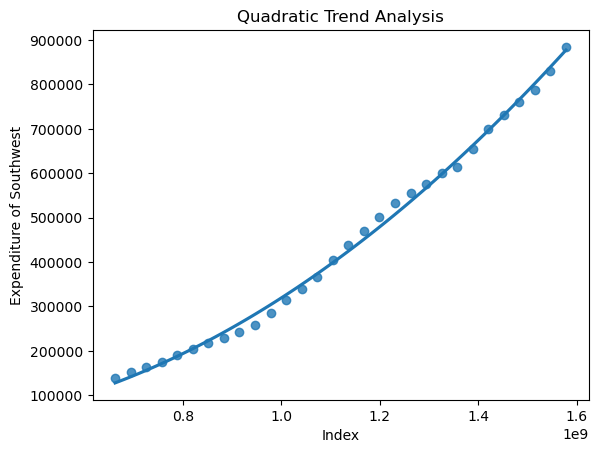

In [182]:
x = df_Southwest.index.astype('int64') // 10**9  # Convert DateTime to Unix timestamp
y = df_Southwest['Southwest']
coeffs = np.polyfit(x,y, 2)
quadratic_fit = np.polyval(coeffs, x)


# create the plot
sns.regplot(x=x, y=y, data=df_Southwest, order=2, ci=None)

# set the title and axis labels
plt.title('Quadratic Trend Analysis')
plt.xlabel('Index')
plt.ylabel('Expenditure of Southwest')

# display the plot
plt.show()


## Train Test Split

In [184]:
train_size = int(len(df_Southwest) * 0.8)  # 80% for training, adjust as needed
train, test = df_Southwest[:train_size], df_Southwest[train_size:]

## ARIMA Model

In [185]:
order = (2, 2, 2)
seasonal_order = (0, 0, 0, 12)  
model = SARIMAX(train['Southwest'], order=order, seasonal_order=seasonal_order)
results = model.fit()
print(results.summary())

forecast_steps = len(test)
forecast = results.get_forecast(steps=forecast_steps)
predicted_values = forecast.predicted_mean
conf_int = forecast.conf_int(alpha=0.05)

                               SARIMAX Results                                
Dep. Variable:              Southwest   No. Observations:                   24
Model:               SARIMAX(2, 2, 2)   Log Likelihood                -227.501
Date:                Tue, 13 Feb 2024   AIC                            465.002
Time:                        23:06:41   BIC                            470.457
Sample:                    01-01-1991   HQIC                           466.287
                         - 01-01-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1595      3.700     -0.043      0.966      -7.411       7.092
ar.L2          0.6073      2.243      0.271      0.787      -3.789       5.004
ma.L1         -0.0729      3.644     -0.020      0.9

C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [186]:
mse = mean_squared_error(test['Southwest'], predicted_values)
print(f'Mean Squared Error on Test Set: {mse}')

Mean Squared Error on Test Set: 249773607.80351233


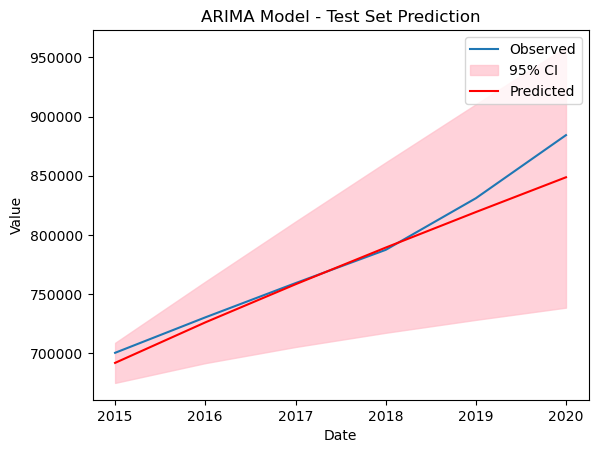

In [187]:
# Plot observed vs predicted values on the test set
plt.plot(test.index, test['Southwest'], label='Observed')
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.7, label='95% CI')
plt.plot(test.index, predicted_values, color='red', label='Predicted')
plt.title('ARIMA Model - Test Set Prediction')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

## Forecasting

C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


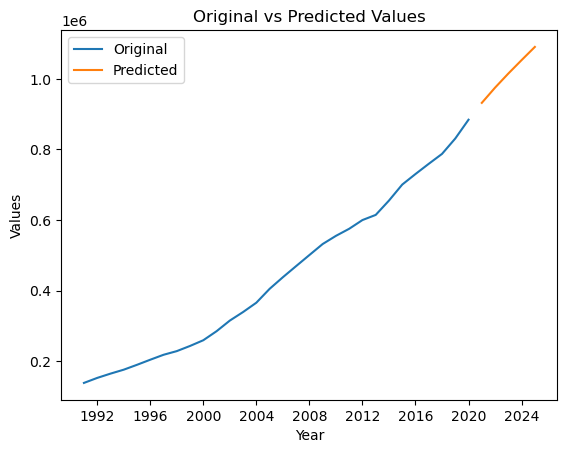

In [188]:
model_full = SARIMAX(df_Southwest['Southwest'], order=order, seasonal_order=seasonal_order)
results_full = model_full.fit()

future_years = 5
forecast_future = results_full.get_forecast(steps=future_years)
predicted_values_future = forecast_future.predicted_mean[:future_years]
merged_df = pd.merge(df_Southwest, predicted_values_future, left_index=True, right_index=True, how='outer')

plt.plot(merged_df.index, merged_df['Southwest'], label='Original')
plt.plot(merged_df.index, merged_df['predicted_mean'], label='Predicted')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Original vs Predicted Values')
plt.legend()

# Show the plot
plt.show()

In [189]:
predicted_values_future

2021-01-01    9.320346e+05
2022-01-01    9.751924e+05
2023-01-01    1.015109e+06
2024-01-01    1.053159e+06
2025-01-01    1.090578e+06
Freq: AS-JAN, Name: predicted_mean, dtype: float64

## 7. Rocky Mountains

In [24]:
df_Rocky_Mountains

,Rocky Mountains
1991-01-01,38121.0
1992-01-01,41631.0
1993-01-01,44855.0
1994-01-01,47799.0
1995-01-01,51803.0
1996-01-01,55502.0
1997-01-01,59404.0
1998-01-01,63614.0
1999-01-01,67495.0
2000-01-01,74531.0


## Line Plot

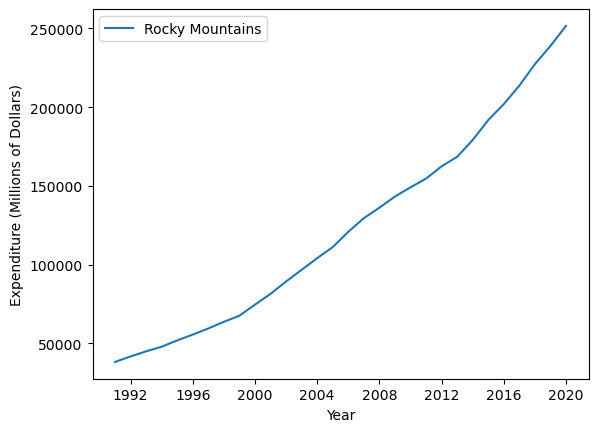

In [25]:
sns.lineplot(df_Rocky_Mountains)
plt.xlabel("Year")
plt.ylabel("Expenditure (Millions of Dollars)")
plt.show()

## ACF and PACF

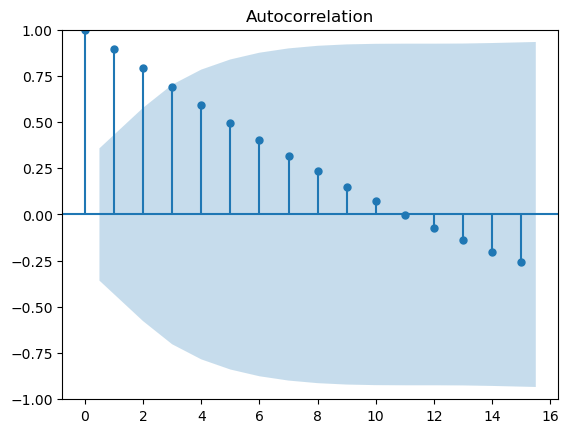

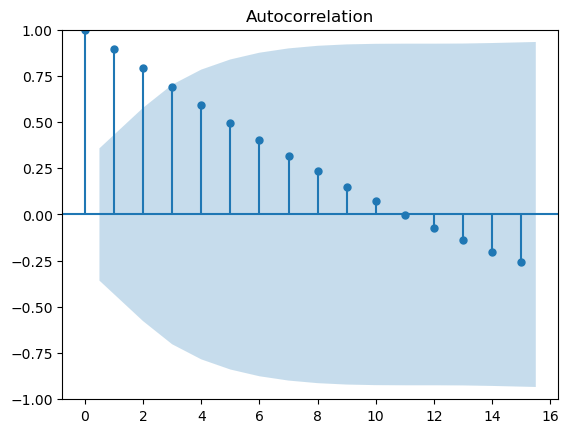

In [26]:
plot_acf(df_Rocky_Mountains['Rocky Mountains'])

C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


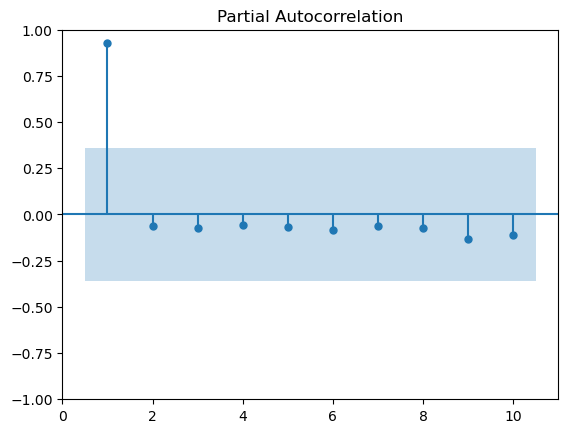

In [27]:
plot_pacf(df_Rocky_Mountains['Rocky Mountains'], lags=10, zero=False)
plt.show()


## Trend Analysis

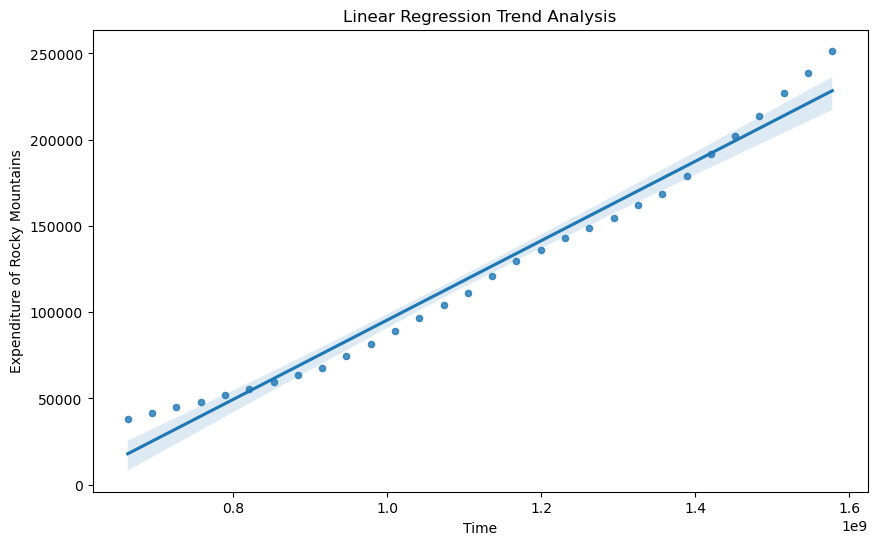

In [28]:
#sns.regplot(x=df_ny.index, y='New York', data=df_ny)
x = df_Rocky_Mountains.index.astype('int64') // 10**9 
y = df_Rocky_Mountains["Rocky Mountains"]
plt.figure(figsize=(10, 6))
sns.regplot(x=x, y=y,data = df_Rocky_Mountains,scatter_kws={'s':20})

# set the title and axis labels
plt.title('Linear Regression Trend Analysis')
plt.xlabel('Time')
plt.ylabel('Expenditure of Rocky Mountains')

# display the plot
plt.show()

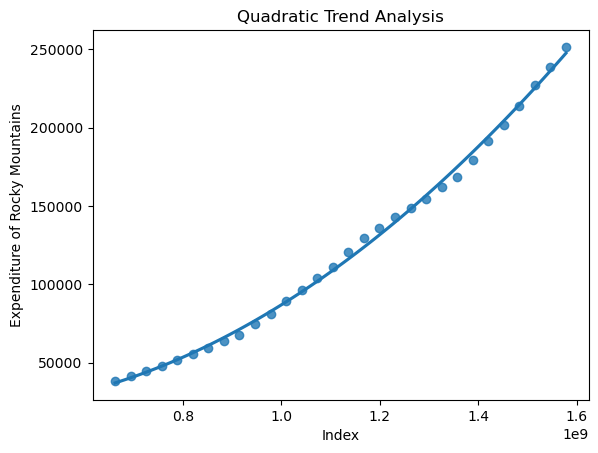

In [29]:
x = df_Rocky_Mountains.index.astype('int64') // 10**9  # Convert DateTime to Unix timestamp
y = df_Rocky_Mountains['Rocky Mountains']
coeffs = np.polyfit(x,y, 2)
quadratic_fit = np.polyval(coeffs, x)


# create the plot
sns.regplot(x=x, y=y, data=df_Rocky_Mountains, order=2, ci=None)

# set the title and axis labels
plt.title('Quadratic Trend Analysis')
plt.xlabel('Index')
plt.ylabel('Expenditure of Rocky Mountains')

# display the plot
plt.show()


## Train Test Split

In [31]:
train_size = int(len(df_Rocky_Mountains) * 0.8)  # 80% for training, adjust as needed
train, test = df_Rocky_Mountains[:train_size], df_Rocky_Mountains[train_size:]

## Forecasting

In [57]:
order = (2, 2, 2)
seasonal_order = (0, 0, 0, 12)  
model = SARIMAX(train['Rocky Mountains'], order=order, seasonal_order=seasonal_order)
results = model.fit()
print(results.summary())

forecast_steps = len(test)
forecast = results.get_forecast(steps=forecast_steps)
predicted_values = forecast.predicted_mean
conf_int = forecast.conf_int(alpha=0.05)

                               SARIMAX Results                                
Dep. Variable:        Rocky Mountains   No. Observations:                   24
Model:               SARIMAX(2, 2, 2)   Log Likelihood                -193.343
Date:                Tue, 13 Feb 2024   AIC                            396.687
Time:                        22:25:48   BIC                            402.142
Sample:                    01-01-1991   HQIC                           397.972
                         - 01-01-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2823      0.648     -0.436      0.663      -1.553       0.988
ar.L2         -0.9740      0.073    -13.339      0.000      -1.117      -0.831
ma.L1          0.2947      0.609      0.484      0.6

C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [58]:
mse = mean_squared_error(test['Rocky Mountains'], predicted_values)
print(f'Mean Squared Error on Test Set: {mse}')

Mean Squared Error on Test Set: 29775601.980897844


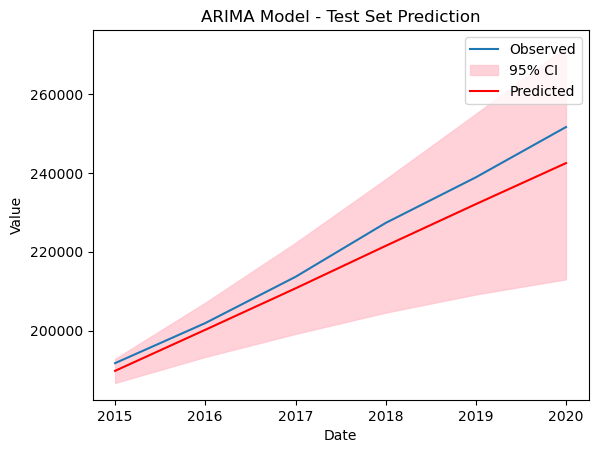

In [59]:
# Plot observed vs predicted values on the test set
plt.plot(test.index, test['Rocky Mountains'], label='Observed')
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.7, label='95% CI')
plt.plot(test.index, predicted_values, color='red', label='Predicted')
plt.title('ARIMA Model - Test Set Prediction')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

## Forecasting

C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


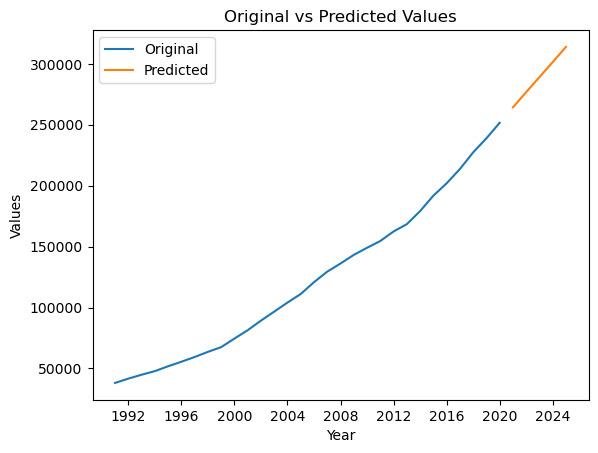

In [60]:
model_full = SARIMAX(df_Rocky_Mountains['Rocky Mountains'], order=order, seasonal_order=seasonal_order)
results_full = model_full.fit()

future_years = 5
forecast_future = results_full.get_forecast(steps=future_years)
predicted_values_future = forecast_future.predicted_mean[:future_years]
merged_df = pd.merge(df_Rocky_Mountains, predicted_values_future, left_index=True, right_index=True, how='outer')

plt.plot(merged_df.index, merged_df['Rocky Mountains'], label='Original')
plt.plot(merged_df.index, merged_df['predicted_mean'], label='Predicted')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Original vs Predicted Values')
plt.legend()

# Show the plot
plt.show()

In [61]:
predicted_values_future

2021-01-01    264291.319592
2022-01-01    276782.544586
2023-01-01    289103.967663
2024-01-01    301420.467768
2025-01-01    313882.769698
Freq: AS-JAN, Name: predicted_mean, dtype: float64

## 8. Far West

In [62]:
df_Far_West

,Far West
1991-01-01,244496.0
1992-01-01,266185.0
1993-01-01,282604.0
1994-01-01,294754.0
1995-01-01,308562.0
1996-01-01,323297.0
1997-01-01,336475.0
1998-01-01,359824.0
1999-01-01,379295.0
2000-01-01,401431.0


## Line Plot

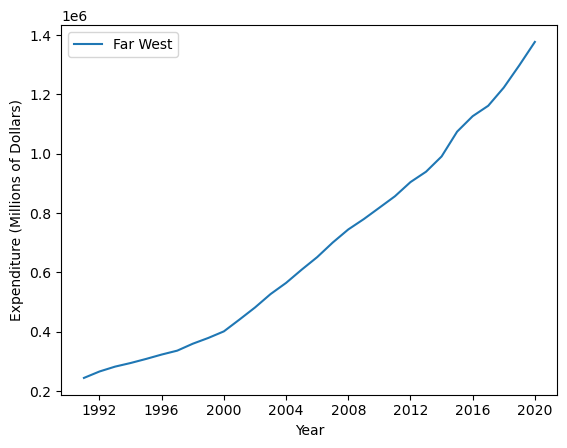

In [63]:
sns.lineplot(df_Far_West)
plt.xlabel("Year")
plt.ylabel("Expenditure (Millions of Dollars)")
plt.show()


## ACF and PACF

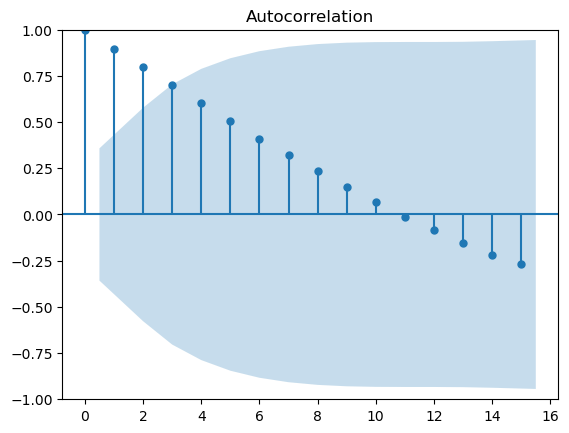

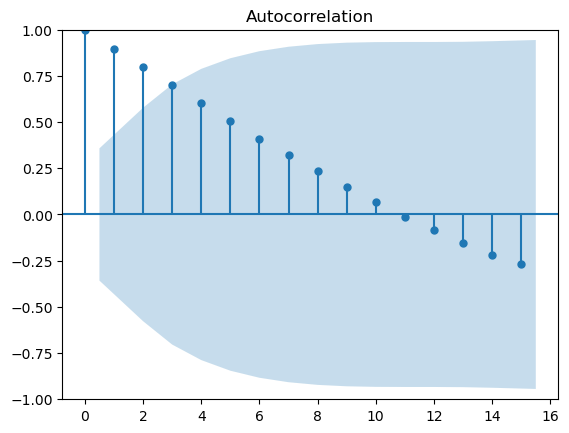

In [65]:
plot_acf(df_Far_West['Far West'])

C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


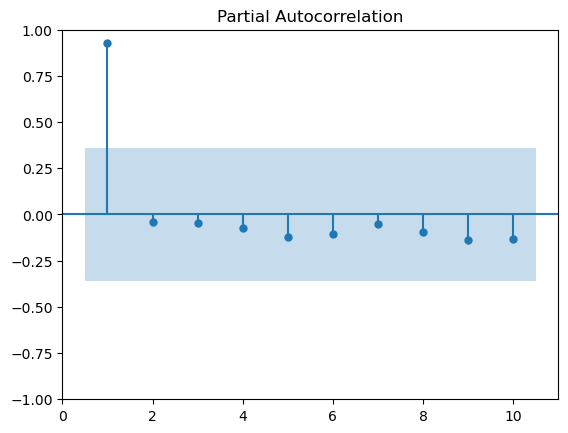

In [66]:
plot_pacf(df_Far_West['Far West'], lags=10, zero=False)
plt.show()


## Trend Analysis

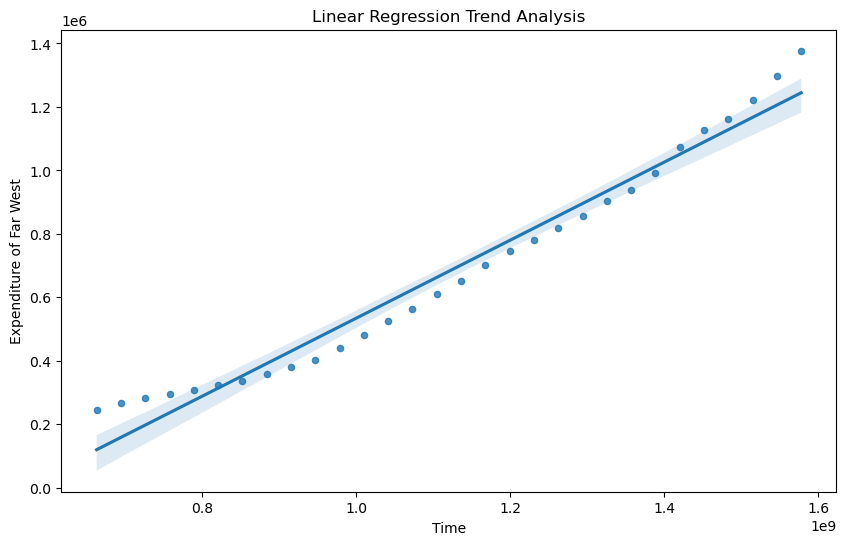

In [67]:
#sns.regplot(x=df_ny.index, y='New York', data=df_ny)
x = df_Far_West.index.astype('int64') // 10**9 
y = df_Far_West["Far West"]
plt.figure(figsize=(10, 6))
sns.regplot(x=x, y=y,data = df_Far_West,scatter_kws={'s':20})

# set the title and axis labels
plt.title('Linear Regression Trend Analysis')
plt.xlabel('Time')
plt.ylabel('Expenditure of Far West')

# display the plot
plt.show()

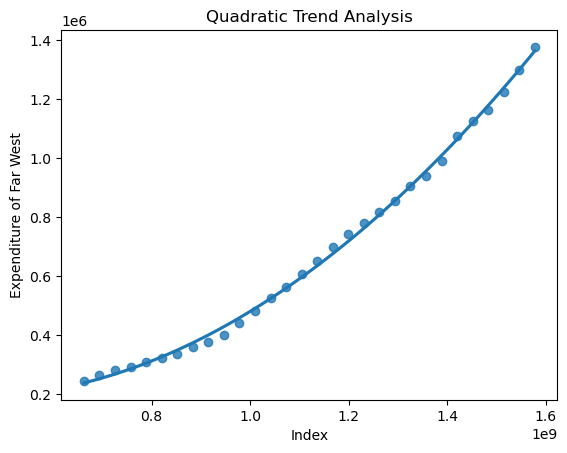

In [68]:
x = df_Far_West.index.astype('int64') // 10**9  # Convert DateTime to Unix timestamp
y = df_Far_West['Far West']
coeffs = np.polyfit(x,y, 2)
quadratic_fit = np.polyval(coeffs, x)


# create the plot
sns.regplot(x=x, y=y, data=df_Far_West, order=2, ci=None)

# set the title and axis labels
plt.title('Quadratic Trend Analysis')
plt.xlabel('Index')
plt.ylabel('Expenditure of Far West')

# display the plot
plt.show()


## Train Test Split

In [70]:
train_size = int(len(df_Far_West) * 0.8)  # 80% for training, adjust as needed
train, test = df_Far_West[:train_size], df_Far_West[train_size:]


## ARIMA Model

In [96]:
order = (2, 2, 2)
seasonal_order = (0, 0, 0, 12)  
model = SARIMAX(train['Far West'], order=order, seasonal_order=seasonal_order)
results = model.fit()
print(results.summary())

forecast_steps = len(test)
forecast = results.get_forecast(steps=forecast_steps)
predicted_values = forecast.predicted_mean
conf_int = forecast.conf_int(alpha=0.05)

                               SARIMAX Results                                
Dep. Variable:               Far West   No. Observations:                   24
Model:               SARIMAX(2, 2, 2)   Log Likelihood                -226.828
Date:                Tue, 13 Feb 2024   AIC                            463.655
Time:                        22:38:05   BIC                            469.111
Sample:                    01-01-1991   HQIC                           464.940
                         - 01-01-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2956      0.307     -4.223      0.000      -1.897      -0.694
ar.L2         -0.9677      0.331     -2.927      0.003      -1.616      -0.320
ma.L1          1.2994      0.298      4.356      0.0

C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [97]:
mse = mean_squared_error(test['Far West'], predicted_values)
print(f'Mean Squared Error on Test Set: {mse}')

Mean Squared Error on Test Set: 2097555657.5235348


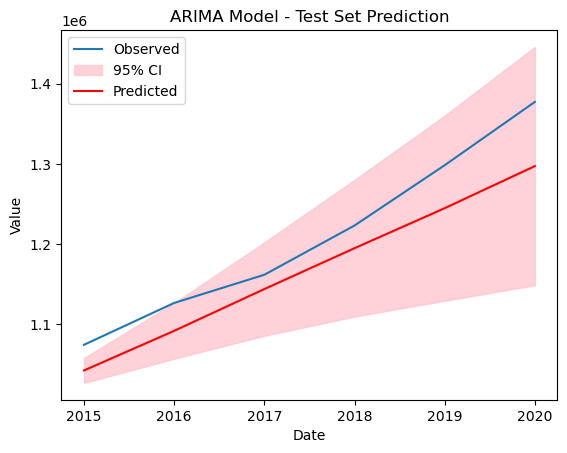

In [98]:
# Plot observed vs predicted values on the test set
plt.plot(test.index, test['Far West'], label='Observed')
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.7, label='95% CI')
plt.plot(test.index, predicted_values, color='red', label='Predicted')
plt.title('ARIMA Model - Test Set Prediction')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

## Forecasting

C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


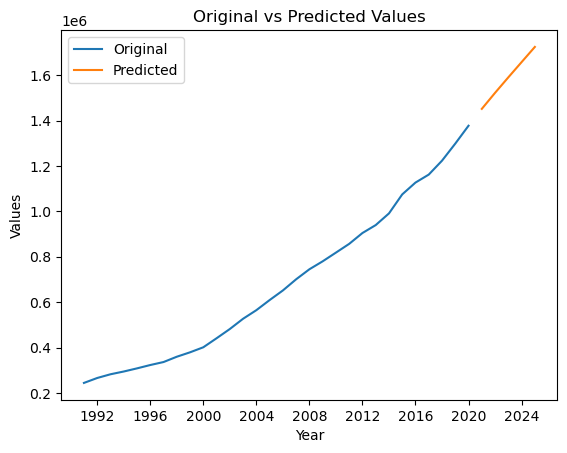

In [99]:
model_full = SARIMAX(df_Far_West['Far West'], order=order, seasonal_order=seasonal_order)
results_full = model_full.fit()

future_years = 5
forecast_future = results_full.get_forecast(steps=future_years)
predicted_values_future = forecast_future.predicted_mean[:future_years]
merged_df = pd.merge(df_Far_West, predicted_values_future, left_index=True, right_index=True, how='outer')

plt.plot(merged_df.index, merged_df['Far West'], label='Original')
plt.plot(merged_df.index, merged_df['predicted_mean'], label='Predicted')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Original vs Predicted Values')
plt.legend()

# Show the plot
plt.show()


In [100]:
predicted_values_future

2021-01-01    1.451365e+06
2022-01-01    1.521957e+06
2023-01-01    1.590121e+06
2024-01-01    1.657136e+06
2025-01-01    1.724145e+06
Freq: AS-JAN, Name: predicted_mean, dtype: float64